In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

%matplotlib inline

In [109]:
import os
os.getcwd() 

'/Users/alexisklopack/.Trash/911_new'

In [110]:
#os.listdir()

# Load csv into Pandas DataFrame

call_data_2016: All of the 911 call data from the year 2016

weater_data: All of the Seattle weather data from 2011 to 2016

In [111]:
call_data_2016 = pd.read_csv('2016 data.csv')

call_data_2016

,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Date,Time,Longitude,Latitude
0,PARKING VIOLATION (EXCEPT ABANDONED VEHICLES),PARKING VIOLATIONS,TRAFFIC RELATED CALLS,1/1/16 0:00,1/1/16,0:00,-122.358650,47.626724
1,SUSPICIOUS PERSON,SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS CIRCUMSTANCES,1/1/16 0:02,1/1/16,0:02,-122.334206,47.576653
2,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,0:02,-122.332880,47.601300
3,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:02,1/1/16,0:02,-122.357800,47.521950
4,BLOCKING VEHICLE,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:05,1/1/16,0:05,-122.284100,47.556450
5,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,1/1/16 0:08,1/1/16,0:08,-122.386765,47.569736
6,"HARASSMENT, THREATS","THREATS, HARASSMENT","THREATS, HARASSMENT",1/1/16 0:09,1/1/16,0:09,-122.303310,47.605120
7,"ANIMALS - INJURED, DEAD, DANGEROUS",ANIMAL COMPLAINTS,ANIMAL COMPLAINTS,1/1/16 0:09,1/1/16,0:09,-122.273390,47.551907
8,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,1/1/16 0:11,1/1/16,0:11,-122.258200,47.514280
9,"DISTURBANCE, OTHER",DISTURBANCES,DISTURBANCES,1/1/16 0:13,1/1/16,0:13,-122.333170,47.614820


In [112]:
weather_data = pd.read_csv('weather data.csv')

#weather_data

#### weather_condition

To be used with later functions. Sets up the different weather conditions that we can plot against 911 data. 

In [113]:
### weather conditions (2016 only!!!)

precip = np.array(weather_data.ix[1665:2048, 4])
temp_max = np.array(weather_data.ix[1665:2048, 8])
temp_min = np.array(weather_data.ix[1665:2048, 9])

In [114]:
## how to make an average_temp weather condition, where each item in the array is column 8 and 9 averaged together

average_temp = np.zeros(len(weather_data.ix[1665:2048, 8]))

for day in range(len(weather_data.ix[1665:2048, 8])): 
    avg = (weather_data.ix[1665+day, 8] + weather_data.ix[1665+day, 9])/2
    average_temp[day] = avg

#average_temp

#### crime_condition

To be used with later functions. Lists all the possible call types to be analyzed and differentiated. 

*Most general classification of calls in the data. Other listings for groups are more specific and include subgroupings.*

In [115]:
## for 2016 strictly

event_clearance_groups = call_data_2016.ix[:,2].unique()
#event_clearance_groups

# Code to create a list of counts for *all* calls

In [116]:
## For 2016

starting_date = '1/1/16' 
all_calls = [] 
counter = 0

for i in range(len(call_data_2016.index)):    
    if call_data_2016.ix[i, 4] == starting_date:         
        counter += 1
    else:     
        all_calls.append(counter)     
        starting_date = call_data_2016.ix[i, 4]
        counter = 0
    
#print(all_calls)

### Narcotics Test Run

In [117]:
# For 2016

date = '1/1/16' 
day_data = [] 
narc = 0

for i in range(len(call_data_2016.index)):    
    if call_data_2016.ix[i, 4] == date:         
        # print('found date')        
        if call_data_2016.ix[i, 2] == 'NARCOTICS COMPLAINTS':             
            narc = narc + 1            
            # print('narcotics event')   
    else:     
        #print(date) 
        #print(narc)
        day_data.append(narc)     
        date = call_data_2016.ix[i, 4]
        narc = 0
        
        # print(narc)
    
#print(day_data)

In [13]:
len(day_data)

364

In [14]:
#weather_data.ix[1665:2075, :]

#### The code for this double-y-axis graph was taken from the Matplotlib example code: 

http://matplotlib.org/examples/api/two_scales.html

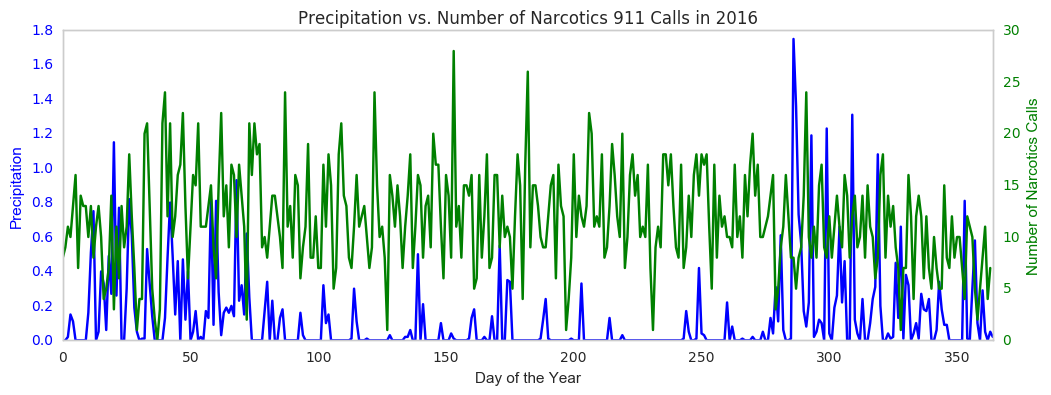

In [143]:
#fig = plt.figure(figsize = (12,4))

#plt.plot(precip, 'blue', label='Precipitation')
#plt.plot(day_data, 'green', label='Narcotics Complaints')
#plt.legend()
#plt.xlim(0, 365)
#plt.ylim(0, 35)
#plt.xlabel('Day of the Year')
#plt.ylabel('Number of Narcotics Calls')
#plt.ylabel

fig2, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(precip, 'b')
ax1.set_xlabel('Day of the Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Precipitation', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(day_data, 'g')
ax2.set_ylabel('Number of Narcotics Calls', color='g')
ax2.tick_params('y', colors='g')

plt.xlim(0, len(day_data))
plt.title('Precipitation vs. Number of Narcotics 911 Calls in 2016')


plt.show()
fig2.savefig('precipitation_narcotics_title.png')

In [ ]:
plt.hist(day_data, bins=10, color='orange')
plt.xlabel('Number of Narcotics Complaints Made')
plt.ylabel('Frequency')
plt.title('Frequency of Narcotics Calls Per Day in 2016')

plt.show()
#plt.savefig('freq_narcotics___.png')

## Defining functions for graphing and call type arrays

call_type_freq() will return a list of length 365, each entry represents a day of the year. Each value represents the number of calls made on that day of each type. 

In [121]:
def call_type_freq(start_date, event_clearance_group):

    daylist = [] 
    count = 0

    for i in range(len(call_data_2016.index)):
        if call_data_2016.ix[i, 4] == start_date:                
            if call_data_2016.ix[i, 2] == event_clearance_group:             
                count = count + 1            
        else:
            daylist.append(count)
            start_date = call_data_2016.ix[i, 4]
            count = 0
    return daylist


In [122]:
#burglary = call_type_freq('1/1/16', 'BURGLARY')

In [123]:
#burglary

plot_two_sided() will return a double y-axis plot of a weather condition (defined above as precipitation, maximum temperature, minimum temperature, and average temperature) and a 911 call type (defined and created above by the call_type_freq() function) versus the day of the year (2016).

In [152]:
def plot_two_sided(weather_condition, weather_label, crime_condition, crime_label, title):

    fig, ax1 = plt.subplots(figsize=(12,4))
    ax1.plot(weather_condition, 'RoyalBlue', alpha=0.8)
    ax1.set_xlabel('Day of the Year')
    ax1.set_ylabel(weather_label, color='RoyalBlue')
    ax1.tick_params('y', colors='RoyalBlue')

    ax2 = ax1.twinx()
    ax2.plot(crime_condition, 'firebrick', alpha=0.8)
    ax2.set_ylabel(crime_label, color='firebrick')
    ax2.tick_params('y', colors='firebrick')
    
    plt.xlim(0, len(crime_condition))
    plt.title(title)

    plt.show()
    
    fig.savefig(title+'.jpeg')
#plot_two_sided(precip, 'Precipitation', burglary, 'Burglaries', 'Burglaries vs. Precipitation, 2016')

## Testing Different Call Types and Weather Patterns

just tryin things out

In [14]:
#public_gatherings = call_type_freq('1/1/16','PUBLIC GATHERINGS')

#plot_two_sided(precip, 'Precipitation', public_gatherings, 'Public Gatherings', 
#               'Public Gatherings vs. Precipitation, 2016')

In [15]:
#plot_two_sided(temp_max, 'Maximum Temperature', public_gatherings, 'Public Gatherings', 
#               'Number of Public Gatherings and Maximum Temperature, 2016')

In [126]:
liquor_violations = call_type_freq('1/1/16','LIQUOR VIOLATIONS')



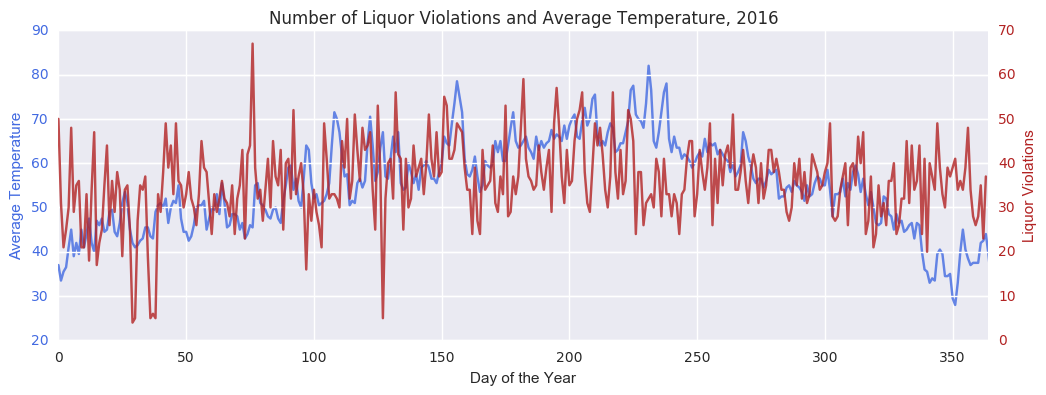

In [153]:
plot_two_sided(average_temp, 'Average Temperature', liquor_violations, 'Liquor Violations', 
               'Number of Liquor Violations and Average Temperature, 2016')


In [135]:
#plot_two_sided(, 'Precip (in)', liquor_violations, 'Liquor Violations', 
#               'Number of Liquor Violations and Maximum Temperature, 2016')

# All types of calls versus temperature and precipitation

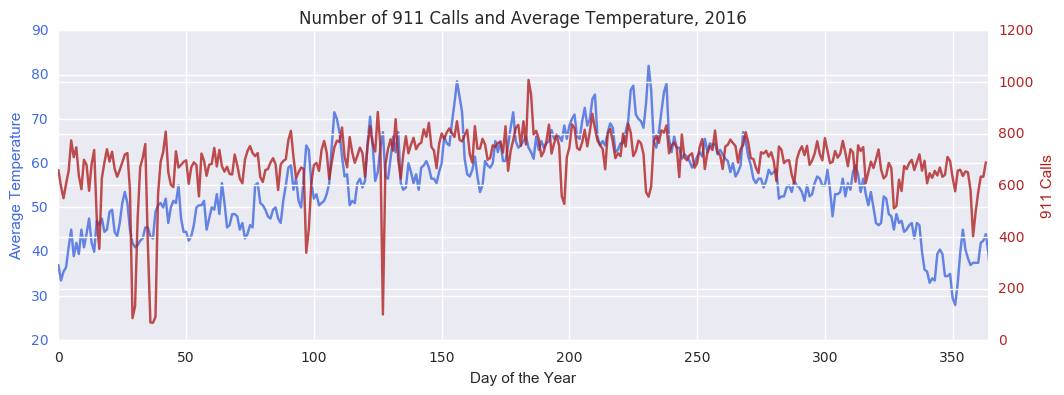

In [154]:
fig = plot_two_sided(average_temp, 'Average Temperature', all_calls, '911 Calls', 
               'Number of 911 Calls and Average Temperature, 2016')


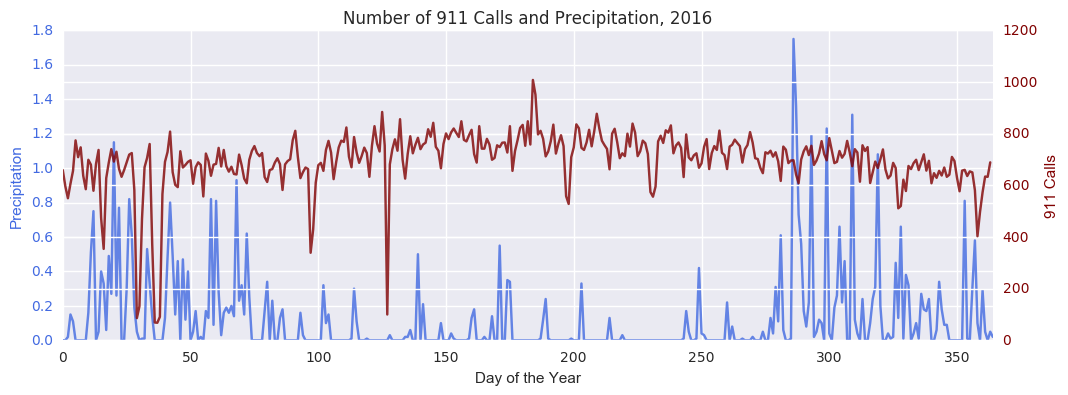

In [249]:
plot_two_sided(precip, 'Precipitation', all_calls, '911 Calls', 
               'Number of 911 Calls and Precipitation, 2016')

# Statistics

What do we want to do about the statistics issue? How do we compare two plotted lines to see how significant these results are? Have to figure out if this is important or just some coincidence

# Working on sorting by time

call_time_freq() is a function 

In [145]:
def call_time_freq(start_date):
    
    hourlist = np.zeros(24)  
    count = 0
    time = '0:00'

    for i in range(len(call_data_2016.index)):
        
        import time
        time = time.strptime(call_data_2016.ix[i, 5], '%H:%M').tm_hour
        current = hourlist[time]
        hourlist[time] = current + 1
        
    return hourlist

In [146]:
print(call_data_2016.ix[1, 5])

import time

time = time.strptime(call_data_2016.ix[1, 5], '%H:%M')
time.tm_hour

0:02


0

In [147]:
import time 

time.strptime(call_data_2016.ix[1, 5], '%H:%M').tm_hour

0

In [148]:
call_time = call_time_freq('1/1/16')

In [149]:
call_time

array([ 10953.,   9892.,   8187.,   8823.,   6636.,   4694.,   4296.,
         6192.,   7814.,   8572.,   9057.,  12187.,  12269.,  12991.,
        12497.,  12368.,  13132.,  12919.,  11969.,  16369.,  14088.,
        13193.,  13191.,  12317.])

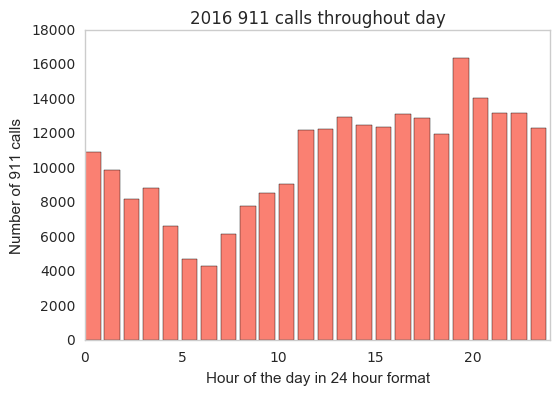

In [150]:
ind = np.arange(24)

plt.bar(ind, call_time, color = 'Salmon')

plt.ylabel('Number of 911 calls')
plt.xlabel('Hour of the day in 24 hour format')
plt.title('2016 911 calls throughout day')
plt.xlim(0, 24)

plt.savefig('2016 911 calls.jpg')

In [71]:
def call_time_freq_defined(start_date, refine):

    hourlist = np.zeros(24)  
    count = 0
    time = '0:00'

    for i in range(len(call_data_2016.index)):
        
        if call_data_2016.ix[i, 2] == refine:         
        
            import time
            time = time.strptime(call_data_2016.ix[i, 5], '%H:%M').tm_hour
            current = hourlist[time]
            hourlist[time] = current + 1
        
    return hourlist 

In [22]:
traffic_calls = call_time_freq_defined('1/1/16', 'TRAFFIC RELATED CALLS')

In [ ]:
traffic_calls

In [23]:
liquor_calls = call_time_freq_defined('1/1/16', 'LIQUOR VIOLATIONS')

In [ ]:
liquor_calls

In [24]:
ind = np.arange(24)

width = 0.35 

a = plt.bar(ind, traffic_calls, width, color = 'Red', alpha=0.6, label = 'Traffic calls')
b = plt.bar(ind + width, liquor_calls, width, color = 'Blue', alpha=0.6, label = 'Liquor calls')
plt.ylabel('Number of 911 calls')
plt.xlabel('Hour of the day in 24 hour format')
plt.title('2016 Traffic related calls throughout day')
plt.xlim(0, 24)

plt.legend((a[0], b[0]), ('Traffic calls', 'Liquor calls'))

plt.savefig('2016 Traffic and alcohol related 911 calls.jpg')

plt.show()



NameError: name 'traffic_calls' is not defined

In [28]:
print(event_clearance_groups)

['TRAFFIC RELATED CALLS' 'SUSPICIOUS CIRCUMSTANCES' 'DISTURBANCES'
 'THREATS, HARASSMENT' 'ANIMAL COMPLAINTS' 'NUISANCE, MISCHIEF'
 'FALSE ALACAD' 'NARCOTICS COMPLAINTS' 'BURGLARY' 'FRAUD CALLS' 'ASSAULTS'
 'MOTOR VEHICLE COLLISION INVESTIGATION' 'LIQUOR VIOLATIONS' 'ARREST'
 'BEHAVIORAL HEALTH' 'HAZARDS' 'OTHER PROPERTY' 'TRESPASS' 'WEAPONS CALLS'
 'PROPERTY - MISSING, FOUND' 'ROBBERY' 'PERSON DOWN/INJURY'
 'PROPERTY DAMAGE' 'PUBLIC GATHERINGS' 'CAR PROWL' 'SHOPLIFTING'
 'AUTO THEFTS' 'BIKE' 'PERSONS - LOST, FOUND, MISSING'
 'MISCELLANEOUS MISDEMEANORS' 'LEWD CONDUCT' 'PROWLER' 'HARBOR CALLS'
 'OTHER VICE' 'PROSTITUTION' 'DRIVE BY (NO INJURY)' 'HOMICIDE'
 'FAILURE TO REGISTER (SEX OFFENDER)' 'RECKLESS BURNING' 'VICE CALLS']


# Heat Mapping

The goal of this heatmap is to visualize when the most calls of different types are taking place. 

In [151]:
import seaborn as sns
sns.set()

In [76]:
heatdata = []
for i in range(40):
    heatdata.append(call_time_freq_defined('1/1/16', event_clearance_groups[i]))
print(heatdata)

[array([ 1418.,  1198.,  1046.,   864.,   844.,   773.,   884.,  1780.,
        2470.,  2466.,  2372.,  2413.,  2446.,  2502.,  2300.,  2277.,
        2290.,  2166.,  1943.,  2010.,  2116.,  2158.,  2115.,  1724.]), array([ 1817.,  1727.,  1399.,  1486.,  1322.,   899.,   672.,   747.,
         893.,   932.,   894.,  1123.,  1680.,  1692.,  1501.,  1498.,
        1598.,  1561.,  1408.,  1995.,  2254.,  2036.,  2090.,  1985.]), array([ 2524.,  2375.,  2040.,  1903.,  1470.,   796.,   641.,   696.,
         708.,   723.,   693.,  1072.,  1333.,  1235.,  1299.,  1354.,
        1417.,  1450.,  1282.,  1979.,  2109.,  1998.,  2165.,  2470.]), array([ 110.,  102.,   77.,  101.,   48.,   31.,   21.,   29.,   27.,
         54.,   64.,  135.,   99.,  129.,  135.,  147.,  166.,  140.,
        154.,  279.,  132.,  129.,  128.,  121.]), array([ 35.,  25.,  21.,  19.,  20.,  16.,   7.,   9.,  19.,  26.,  12.,
        15.,  22.,  19.,  19.,  28.,  34.,  20.,  16.,  44.,  66.,  60.,
        51.,  43.

In [100]:
## can we set up a pandas dataframe that has each hour, and then a count for each type of call? 

hour_df = pd.DataFrame(heatdata)
hour_df.index = event_clearance_groups
hour_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
TRAFFIC RELATED CALLS,1418.0,1198.0,1046.0,864.0,844.0,773.0,884.0,1780.0,2470.0,2466.0,...,2300.0,2277.0,2290.0,2166.0,1943.0,2010.0,2116.0,2158.0,2115.0,1724.0
SUSPICIOUS CIRCUMSTANCES,1817.0,1727.0,1399.0,1486.0,1322.0,899.0,672.0,747.0,893.0,932.0,...,1501.0,1498.0,1598.0,1561.0,1408.0,1995.0,2254.0,2036.0,2090.0,1985.0
DISTURBANCES,2524.0,2375.0,2040.0,1903.0,1470.0,796.0,641.0,696.0,708.0,723.0,...,1299.0,1354.0,1417.0,1450.0,1282.0,1979.0,2109.0,1998.0,2165.0,2470.0
"THREATS, HARASSMENT",110.0,102.0,77.0,101.0,48.0,31.0,21.0,29.0,27.0,54.0,...,135.0,147.0,166.0,140.0,154.0,279.0,132.0,129.0,128.0,121.0
ANIMAL COMPLAINTS,35.0,25.0,21.0,19.0,20.0,16.0,7.0,9.0,19.0,26.0,...,19.0,28.0,34.0,20.0,16.0,44.0,66.0,60.0,51.0,43.0
"NUISANCE, MISCHIEF",271.0,235.0,187.0,153.0,189.0,143.0,157.0,332.0,346.0,325.0,...,430.0,472.0,493.0,421.0,295.0,357.0,389.0,337.0,348.0,327.0
FALSE ALACAD,496.0,471.0,367.0,373.0,606.0,475.0,453.0,519.0,506.0,505.0,...,535.0,470.0,473.0,467.0,401.0,405.0,750.0,547.0,529.0,483.0
NARCOTICS COMPLAINTS,90.0,130.0,68.0,142.0,82.0,44.0,39.0,60.0,63.0,88.0,...,266.0,335.0,320.0,297.0,257.0,242.0,276.0,154.0,142.0,105.0
BURGLARY,282.0,248.0,190.0,266.0,127.0,101.0,98.0,109.0,163.0,239.0,...,448.0,443.0,365.0,406.0,345.0,695.0,201.0,289.0,314.0,302.0
FRAUD CALLS,53.0,31.0,30.0,28.0,7.0,9.0,4.0,22.0,52.0,79.0,...,223.0,197.0,212.0,241.0,246.0,250.0,137.0,136.0,151.0,118.0


#### Prepping the data for heatmapping

I used this project as a reference in figuring out how to "prep" the data to make the heatmap: 

https://github.com/cmenguy/crime-analytics/blob/master/crime-analytics.ipynb

This was because the raw data of the call counts for each hour are extremely variable. This makes it hard to visualize with a heatmap because they generally fall into extremes. Especially because some call types, like traffic incidents, are way more common than others, like homicides. 

To prepare the data, I divided each value by the maximum value for the row. This normalizes the values and results in a dataframe with all values between 0 and 1. The result of this prep was a heatmap with comparable values, even for low frequency call types. 

In [85]:
# prep data in hour_df into new df --> heat_prep_df
# divide all data in rows by the max value of the row
# will spit out dataframe with all values between 0 and 1

heat_prep_df = hour_df
m = hour_df.values.max(axis=1)

for row in range(40):
    
    for col in range(24):
        heat_prep_df.iloc[row, col] = hour_df.ix[row, col]/m[row]

#heat_prep_df

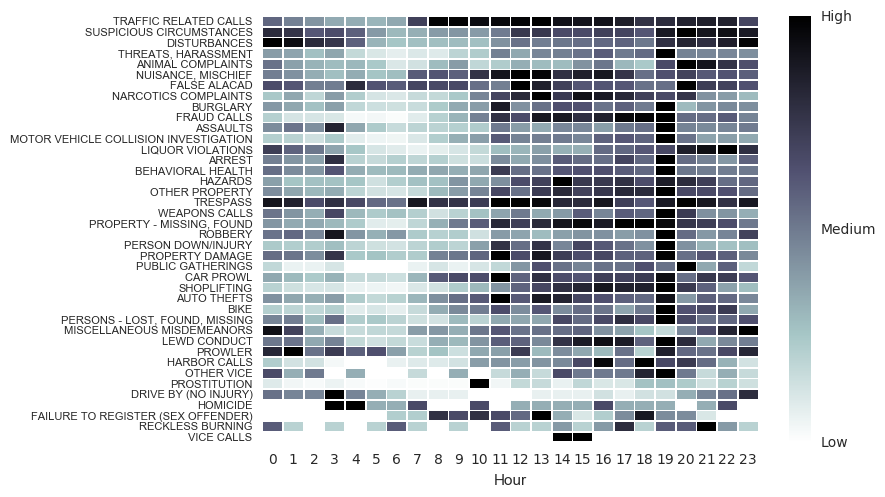

In [83]:
ax = sns.heatmap(heat_prep_df.ix[:, :39], linewidths=0.5, cmap='bone_r') # builds heatmap

for label in ax.get_yticklabels():
    label.set_size(8)  # makes the text labels a little bit smaller --> easier to read

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .5, 1])
cbar.set_ticklabels(['Low', 'Medium', 'High']) # sets the colorbar labels and locations
plt.xlabel('Hour')

fig = ax.get_figure() 
fig.savefig("heatmap_normalized.jpeg", bbox_inches='tight', pad_inches=0.5) 

# Mapping
city of seattle, divided by neighborhoods. 

neighborhood data .shp files were taken from: 

https://data.seattle.gov/dataset/data-seattle-gov-GIS-shapefile-datasets/f7tb-rnup

Inspiration and code adapted from the previous project listed under the heatmapping portion: 

https://github.com/cmenguy/crime-analytics/blob/master/crime-analytics.ipynb

and this project that maps location data in seattle: 

http://beneathdata.com/how-to/visualizing-my-location-history/

In [107]:
####### make an array that contains color strings corresponding to each call type. 
####### use for loop to go through call_data_2016 
####### use if / else statements to assign a different color for all call types

# maybe start with traffic calls? 
call_color = []

for a in range(len(call_data_2016.index)):
    if call_data_2016.ix[a, 2] == 'TRAFFIC RELATED CALLS':
        call_color.append('blue')
    elif call_data_2016.ix[a, 2] == 'BURGLARY':
        call_color.append('green')
    elif call_data_2016.ix[a, 2] == 'ROBERRY':
        call_color.append('green')
    elif call_data_2016.ix[a, 2] == 'CAR PROWL':
        call_color.append('green')
    else: 
        call_color.append('orange')
#print(call_color)

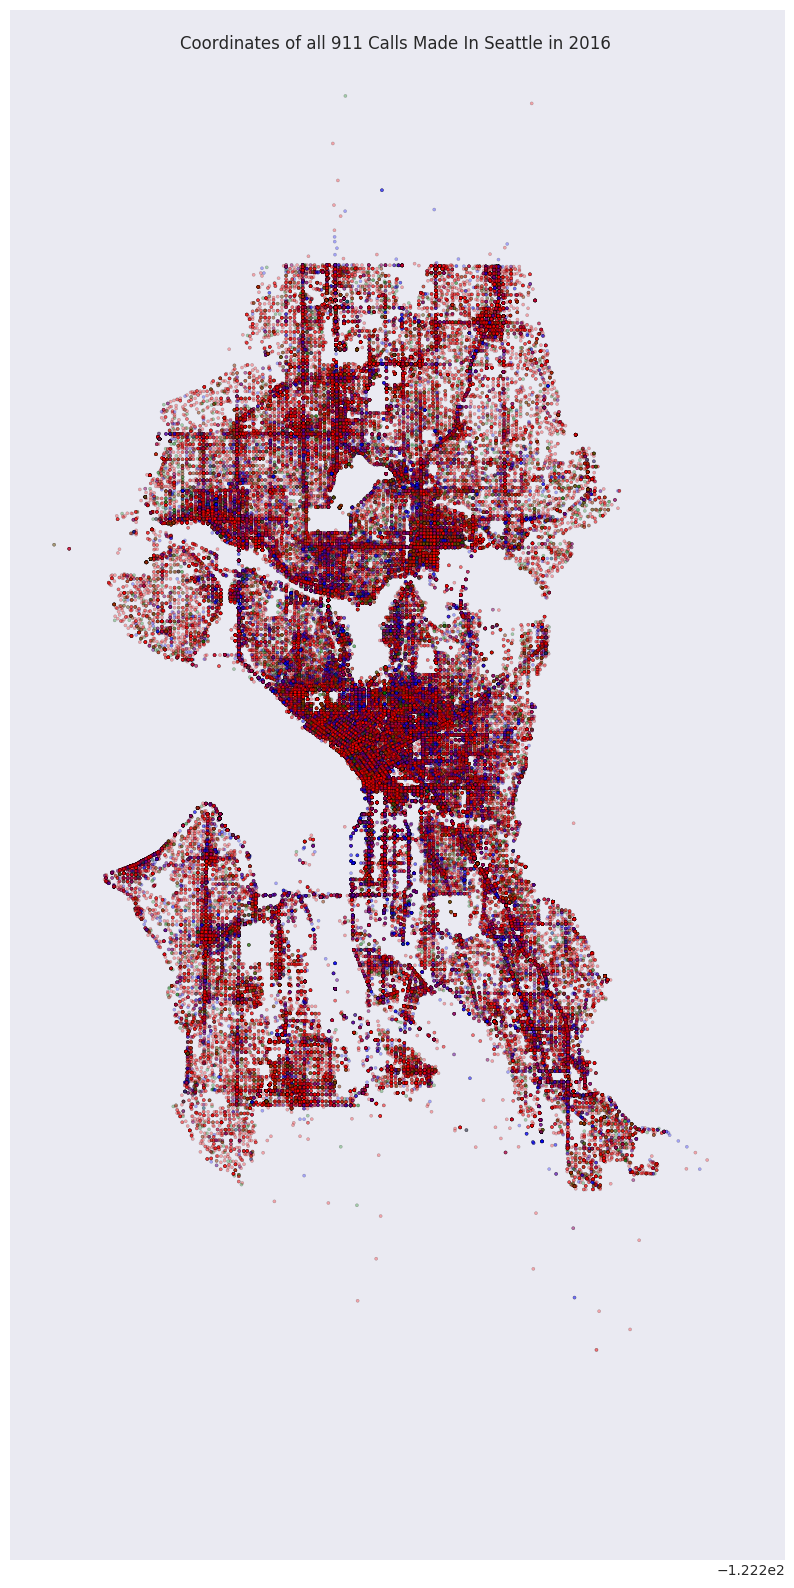

In [105]:
## trying to map coordinates on a scatter plot by lat and lon
import shapefile

sf = shapefile.Reader('Neighborhoods/WGS84/Neighborhoods')

# columns of call_data: lat = 7, long = 6
lon = call_data_2016.ix[:, 6]
lat = call_data_2016.ix[:, 7]

figm = plt.figure(figsize=(10,20))
plt.grid(False)
plt.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',          # both major and minor ticks are affected
    bottom='off',          # ticks along the bottom edge are off
    top='off',             # ticks along the top edge are off
    labelbottom='off', right='off', left='off', labelleft='off')

#plt.title('Coordinates of all 911 Calls Made In Seattle in 2016')
plt.annotate('Coordinates of all 911 Calls Made In Seattle in 2016', xy=(-122.395, 47.79))

######## how to make the colors correspond to different types of calls? 
# c=call_data_2016.ix[:, 2]  makes the code break and the python notebook crash. 

plt.scatter(lon, lat, c=call_color, marker='.', alpha=0.3)

figm.savefig('kind of map.jpeg')

In [5]:
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

code taken from: 

http://basemaptutorial.readthedocs.io/en/latest/shapefile.html

coordinates for seattle from the site: 

http://boundingbox.klokantech.com/

- ll: westlimit=-122.481601; southlimit=47.428552; 
- ur: eastlimit=-122.190793; northlimit=47.762868
- ‘llcrnr’ stands for ‘lower left corner’ and ‘urcrnr’ stands for upper right corner
- lat_0 and lon_0 are the coordinates for the center of the map. 

*resolution needs to be AT LEAST at 'i' before the graph has enough resolution to show the landmass in the correct place.*

/Users/aklopack/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


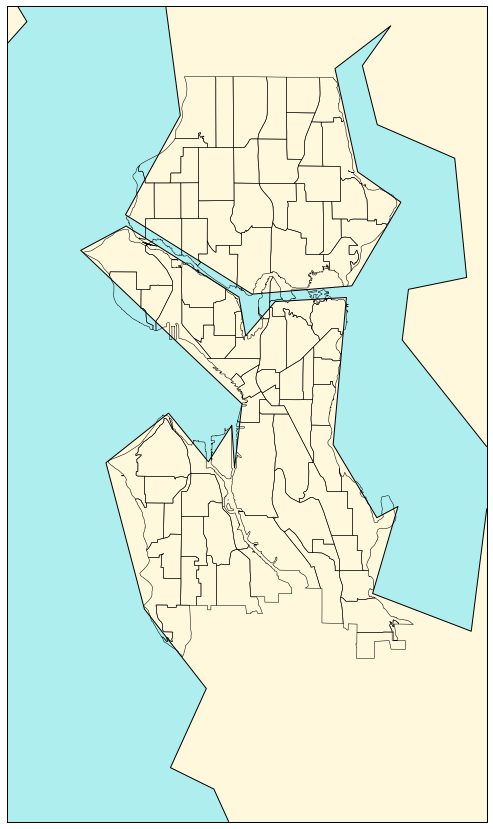

In [117]:
f, a = plt.subplots(figsize=(10,15))



map = Basemap(llcrnrlon=-122.481601, llcrnrlat=47.428552, urcrnrlon=-122.190793, urcrnrlat=47.762868,
             resolution='i', projection='tmerc', lat_0 = 47.55, lon_0 = -122.35)

map.drawmapboundary(fill_color='paleturquoise')
map.fillcontinents(color='cornsilk',lake_color='paleturquoise')
map.drawcoastlines()

map.readshapefile('Neighborhoods/WGS84/Neighborhoods', 'neighbs')

#############################################################################################
#map.plot(lon, lat, 'r.', alpha=0.4)
####### why will points not plot on top of the shape file? 
# even though there's no error message, they don't show up
#############################################################################################

plt.show()


# PCA of heat_prep_df



In [86]:
from sklearn.decomposition import PCA

In [88]:
# first, put heat_prep_df into a np.array using df.asarray

heat_prep_asarray = heat_prep_df.as_matrix()

In [89]:
# second, do PCA on the new array

heat_prep_pca = PCA()  
heat_prep_pca.fit(heat_prep_asarray)

PCA(copy=True, n_components=None, whiten=False)

In [96]:
heat_decomp = heat_prep_pca.explained_variance_ratio_
heat_decomp

array([  3.79780507e-01,   2.27819417e-01,   1.02820929e-01,
         6.29226659e-02,   4.74280224e-02,   4.53233374e-02,
         2.80698533e-02,   2.53143425e-02,   1.62858464e-02,
         1.51992834e-02,   1.26768005e-02,   9.15652400e-03,
         8.64469640e-03,   4.85018905e-03,   3.43434457e-03,
         2.63993317e-03,   2.18853788e-03,   1.58317637e-03,
         9.88035722e-04,   8.69544644e-04,   6.85377790e-04,
         6.01447219e-04,   4.26554300e-04,   2.90633769e-04])

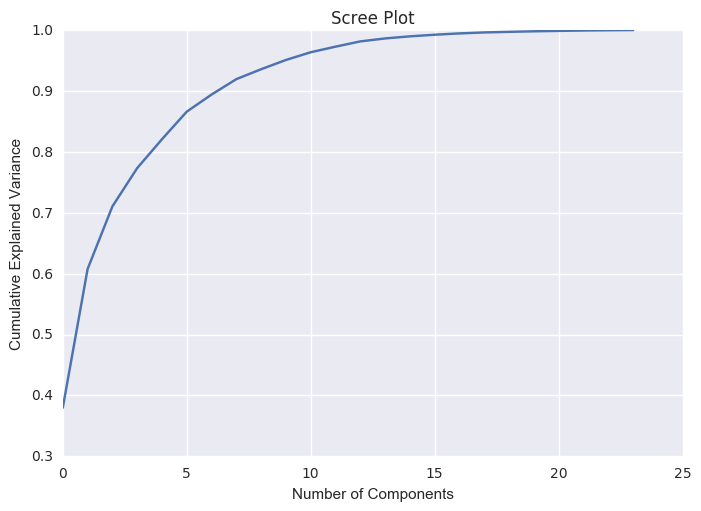

6.230512314547749 components account for 90% of the variance


In [155]:
##### Scree plot 

plt.plot(np.cumsum(heat_decomp))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

comp = np.arange(24)
var = np.cumsum(heat_decomp)
variance90 = np.interp(0.9, var, comp)
print(variance90, 'components account for 90% of the variance')

In [178]:
heat_red = heat_prep_pca.transform(heat_prep_asarray)


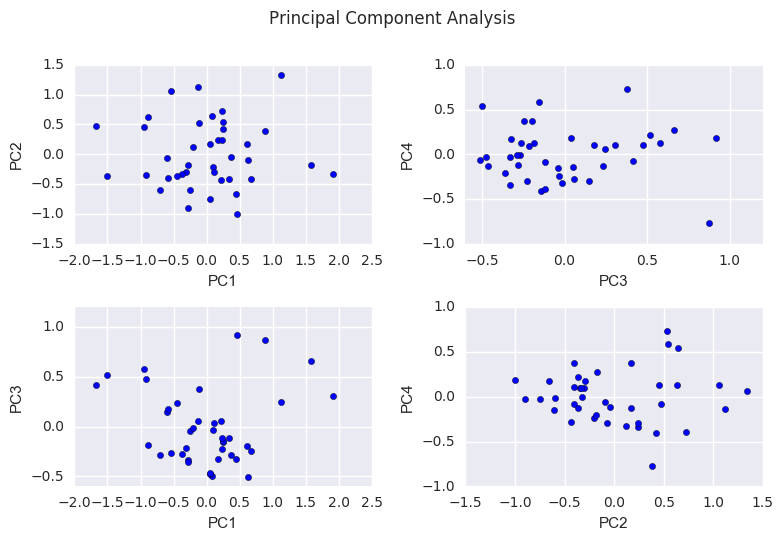

In [180]:
fig = plt.figure()
#ax = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax1.scatter(heat_red[:, 0].flatten(), heat_red[:,1].flatten())
#ax1.set_title('PC1 and PC2')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax2 = fig.add_subplot(222)
ax2.scatter(heat_red[:, 2].flatten(), heat_red[:,3].flatten())
#ax2.set_title('PC3 and PC4')
ax2.set_xlabel('PC3')
ax2.set_ylabel('PC4')

ax3 = fig.add_subplot(223)
ax3.scatter(heat_red[:, 0].flatten(), heat_red[:,2].flatten())
#ax3.set_title('PC1 and PC3')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC3')

ax4 = fig.add_subplot(224)
ax4.scatter(heat_red[:, 1].flatten(), heat_red[:,3].flatten())
#ax4.set_title('PC2 and PC4')
ax4.set_xlabel('PC2')
ax4.set_ylabel('PC4')

fig.suptitle('Principal Component Analysis')

plt.tight_layout()
fig.subplots_adjust(top=0.88)

fig.savefig('PCA_subplots.jpeg')

#### Code for inset graph taken from this tutorial: 

http://akuederle.com/matplotlib-zoomed-up-inset

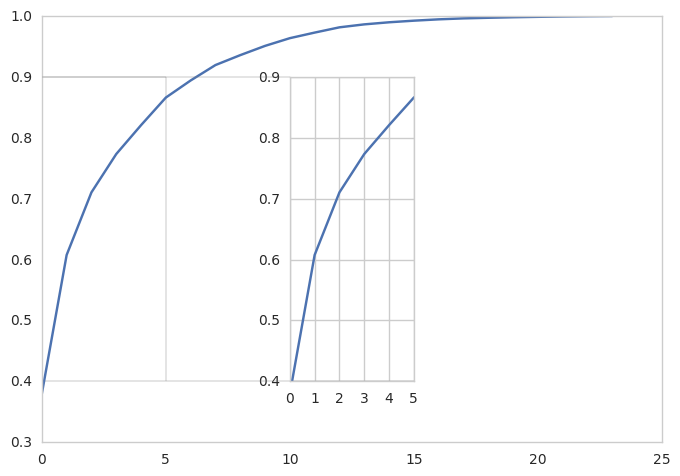

In [202]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax.plot(np.cumsum(heat_decomp))
ax.grid(False)

axins = zoomed_inset_axes(ax, 1, loc=10)
axins.plot(np.cumsum(heat_decomp))
axins.grid(True)

x1, x2, y1, y2 = 0, 5, 0.4, 0.9 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

fig.savefig('scree_plt_inset.jpeg')